<a href="https://colab.research.google.com/github/ARAVIND8985/Bharath-intern/blob/wine_quality/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
wine_dataset= pd.read_csv("winequality-red.csv")
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1044,6.4,0.39,0.33,3.3,0.046,12.0,53,0.99294,3.36,0.62,12.2,6
1045,6.9,0.44,0.00,1.4,0.070,32.0,38,0.99438,3.32,0.58,11.4,6
1046,7.6,0.78,0.00,1.7,0.076,33.0,45,0.99612,3.31,0.62,10.7,6
1047,7.1,0.43,0.17,1.8,0.082,27.0,51,0.99634,3.49,0.64,10.4,5


In [26]:
wine_dataset.shape

(1049, 12)

In [5]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1049.000000,1049.00000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,8.705529,0.52632,0.292164,2.567684,0.089922,15.198284,47.584366,0.997262,3.298742,0.666559,10.284557,5.620591
std,1.814127,0.17969,0.199294,1.240367,0.048936,9.978663,33.041623,0.001821,0.156681,0.180839,1.049150,0.804920
min,4.600000,0.12000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.400000,0.39000,0.120000,1.900000,0.072000,7.000000,23.000000,0.996200,3.190000,0.550000,9.500000,5.000000
50%,8.300000,0.52000,0.280000,2.300000,0.081000,13.000000,38.000000,0.997200,3.300000,0.620000,10.000000,6.000000
75%,9.800000,0.63000,0.460000,2.700000,0.092000,21.000000,63.000000,0.998300,3.390000,0.730000,10.900000,6.000000
max,15.900000,1.33000,1.000000,15.500000,0.611000,68.000000,165.000000,1.003200,3.900000,2.000000,14.900000,8.000000


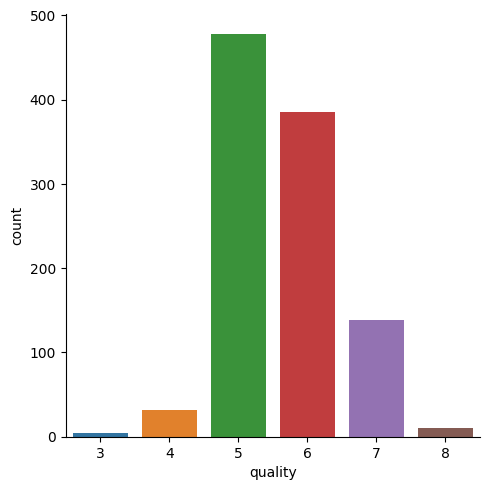

In [29]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

In [32]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape, Y_train.shape, Y_test.shape)


(1049,) (839,) (210,)


In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [35]:
from sklearn.metrics import accuracy_score
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9142857142857143
